In [1]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
 train_data=keras.utils.image_dataset_from_directory(
     directory="D:/datasets/pets/train",
     labels="inferred",
     label_mode="int",
     image_size=(256,256),
     batch_size=32)   

Found 132 files belonging to 2 classes.


In [3]:
test_data=keras.utils.image_dataset_from_directory(
    directory="D:/datasets/pets/test",
    labels="inferred",
    label_mode="int",
    image_size=(256,256),
    batch_size=32)


Found 70 files belonging to 2 classes.


In [4]:
type(test_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [26]:
for images, labels in test_data:
    img=images[0]
    label=labels[0]
    print(label)
    print(img)
    
    break
    

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(
[[[ 36.59822    42.59822    32.59822  ]
  [ 37.         43.         33.       ]
  [ 38.         44.         34.       ]
  ...
  [ 15.         20.         13.6171875]
  [ 12.464844   18.464844   15.605469 ]
  [ 12.464844   18.464844   16.464844 ]]

 [[ 37.         43.         33.       ]
  [ 37.299606   43.299606   33.299606 ]
  [ 38.266922   44.266922   34.266922 ]
  ...
  [ 15.697266   20.697266   14.314453 ]
  [ 15.394531   21.394531   18.535156 ]
  [ 15.394531   21.394531   19.394531 ]]

 [[ 37.16211    43.16211    33.16211  ]
  [ 38.069656   44.069656   34.069656 ]
  [ 39.         45.         35.       ]
  ...
  [ 16.644974   21.644974   15.262161 ]
  [ 15.837891   21.83789    18.978516 ]
  [ 15.837891   21.83789    19.83789  ]]

 ...

 [[129.95312   129.95312   119.953125 ]
  [134.42969   134.42969   124.42969  ]
  [134.32076   134.32076   124.320755 ]
  ...
  [135.31729   133.31729   120.31729  ]
  [128.77539   125.77539   109.81967 

In [6]:
model=Sequential()

In [7]:
#make 1 convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(256,256,3), padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(32, kernel_size=(3,3), padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

#add flatten, hidden, output layer
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

C:\Users\HARMAN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      15,745,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,755,425 (60.10 MB)

 Trainable params: 15,755,425 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
def process(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_ds = train_data.map(process)
test_ds = test_data.map(process)

In [11]:
model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4964 - loss: 809.8149 - val_accuracy: 0.5000 - val_loss: 368.3081
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 940ms/step - accuracy: 0.5148 - loss: 276.5447 - val_accuracy: 0.5000 - val_loss: 62.4280
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 895ms/step - accuracy: 0.5382 - loss: 41.7166 - val_accuracy: 0.4714 - val_loss: 13.0449
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 906ms/step - accuracy: 0.7659 - loss: 3.3670 - val_accuracy: 0.6429 - val_loss: 2.6064
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 941ms/step - accuracy: 0.9623 - loss: 0.0836 - val_accuracy: 0.5857 - val_loss: 4.4317


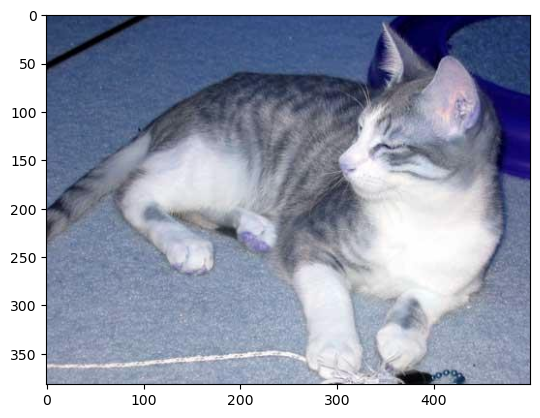

In [24]:
img = cv2.imread('D:/datasets/pets/test/cats/66.jpg')
plt.imshow(img)
img_up = cv2.resize(img, (256,256))
img_up = img_up / 255.0 
img_up1 = img_up.reshape((1,256,256,3))

In [34]:
model.predict(img_up1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


array([[0.5665526]], dtype=float32)